In [1]:
#! pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader #데이터를 특정 길이로 읽어오기
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [3]:
USE_CUDA=torch.cuda.is_available()
print(USE_CUDA)
device=torch.device('cuda' if USE_CUDA else 'cpu')
print("다음기기사용:",device)

False
다음기기사용: cpu


In [5]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_add(777)

In [6]:
epochs=30
batch_size=100

In [8]:
mnist_train=dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),
download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),
download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [10]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [38]:
data_loader=DataLoader(dataset=mnist_train, batch_size=batch_size,shuffle=True,drop_last=True)
#drop_last:데이터셋 크기로 나누고 마지막에 batch로 나누어 떨어지지 않는 나머지를 버릴지 여부를 나타냄
#True:버림, False:그대로 사용

In [39]:
for X,Y in data_loader:
  print(X.size(),Y.size())

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

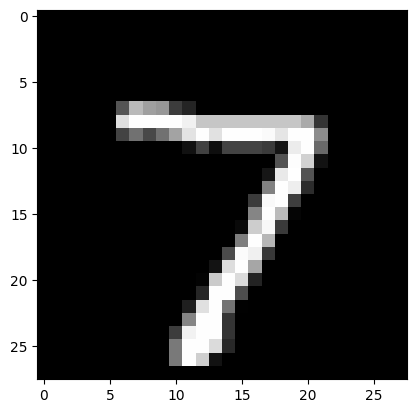

In [40]:
import matplotlib.pyplot as plt
plt.imshow(mnist_test.data[0].view(28,28),cmap='grey')
plt.show()

In [41]:
print(mnist_test.targets[0])

tensor(7)


In [42]:
model=nn.Linear(784,10,bias=True).to(device)
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0312, -0.0163, -0.0056,  ..., -0.0122,  0.0110,  0.0122],
         [-0.0132,  0.0010,  0.0039,  ...,  0.0356,  0.0090,  0.0009],
         [ 0.0105, -0.0259, -0.0269,  ..., -0.0279,  0.0258, -0.0023],
         ...,
         [-0.0112,  0.0132,  0.0052,  ..., -0.0091,  0.0198, -0.0343],
         [ 0.0004, -0.0137, -0.0150,  ..., -0.0055,  0.0301, -0.0250],
         [-0.0299,  0.0247, -0.0011,  ...,  0.0282, -0.0012,  0.0290]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0207, -0.0100, -0.0272,  0.0070, -0.0032,  0.0226, -0.0234, -0.0101,
         -0.0023,  0.0208], requires_grad=True)]

In [44]:
#모델훈련
for epoch in range(epochs):
  avg_cost=0
  total_batch=len(data_loader)
  #한 에포크 안에 100개의 한 배치를 가져와서 
  for X,Y in data_loader:
    X=X.view(-1,28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    y_hat=model(X)
    cost=criterion(y_hat,Y)

    cost.backward()
    optimizer.step()
    avg_cost+=cost/total_batch
  print('epoch:',epoch,'cost:',avg_cost.item())
print("Learning finished!!!")

epoch: 0 cost: 0.5362716317176819
epoch: 1 cost: 0.35930511355400085
epoch: 2 cost: 0.33121442794799805
epoch: 3 cost: 0.31651195883750916
epoch: 4 cost: 0.3070078194141388
epoch: 5 cost: 0.3001282811164856
epoch: 6 cost: 0.2949104607105255
epoch: 7 cost: 0.2907693088054657
epoch: 8 cost: 0.2874043881893158
epoch: 9 cost: 0.2843618094921112
epoch: 10 cost: 0.28189757466316223
epoch: 11 cost: 0.27989837527275085
epoch: 12 cost: 0.2778127193450928
epoch: 13 cost: 0.27627143263816833
epoch: 14 cost: 0.2745214104652405
epoch: 15 cost: 0.2731223404407501
epoch: 16 cost: 0.27169495820999146
epoch: 17 cost: 0.27053043246269226
epoch: 18 cost: 0.26942670345306396
epoch: 19 cost: 0.2681858241558075
epoch: 20 cost: 0.2671591341495514
epoch: 21 cost: 0.26637545228004456
epoch: 22 cost: 0.26557961106300354
epoch: 23 cost: 0.2647884786128998
epoch: 24 cost: 0.2639400362968445
epoch: 25 cost: 0.26351359486579895
epoch: 26 cost: 0.26281049847602844
epoch: 27 cost: 0.2621367871761322
epoch: 28 cost: 0

In [47]:
with torch.no_grad():
  x_test=mnist_test.data.view(-1,28*28).float().to(device)
  #print(x_test.size())
  y_test=mnist_test.targets.to(device)
  #print(y_test.size())

  #위훈련으로 얼마나 정확하게 맞ㄴ추는지 예측하는지
  prediction=model(x_test)
  #print(torch.argmax(prediction[0]))
  correct_pred=y_test==torch.argmax(prediction,1)
  #print(correct_pred[0:10])
  accuracy=correct_pred.float().mean()
  print('accuracy:',accuracy)#정확도


accuracy: tensor(0.8814)
